In [4]:
import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))
sys.path.append(os.path.join(os.getcwd(), '..', ))
sys.path.append(os.path.join(os.getcwd(), '..', '..', 'pplSIT', 'workflow', 'utils'))

In [8]:
%matplotlib inline

from analysis.sessions import selected_008229, selected_013608
from analysis.imports import *
from scipy import stats
from matplotlib.lines import Line2D
from matplotlib.patches import ConnectionPatch
from mpl_toolkits.axes_grid1 import make_axes_locatable
from analysis.correlation import cluster_corr
import matplotlib.animation as animation

In [9]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [10]:
#source = '/home/sobolev/nevermind_ag-grothe/AG_Pecka/data/processed/'
source = '/home/sobolev/nevermind/AG_Pecka/data/processed/'
#source = '/Users/andrey/nevermind/AG_Pecka/data/processed/'

rep_path = '/home/sobolev/nevermind_ag-grothe/Andrey/analysis/PPC/video'

selected = selected_013608
selected[:12]

['013608_ppcSIT_2025-01-06_13-20-52',
 '013608_ppcSIT_2025-01-07_08-47-27',
 '013608_ppcSIT_2025-01-07_15-38-23',
 '013608_ppcSIT_2025-01-09_09-09-55',
 '013608_ppcSIT_2025-01-10_09-25-04',
 '013608_ppcSIT_2025-01-13_14-01-40',
 '013608_ppcSIT_2025-01-14_10-20-14',
 '013608_ppcSIT_2025-01-15_14-56-18',
 '013608_ppcSIT_2025-01-16_09-49-21',
 '013608_ppcSIT_2025-01-17_10-07-00',
 '013608_ppcSIT_2025-01-20_09-38-20',
 '013608_ppcSIT_2025-01-21_08-50-02']

In [11]:
session = selected[7]
#session = '013608_ppcSIT_2025-01-15_14-56-18'
session

'013608_ppcSIT_2025-01-15_14-56-18'

## Load units

In [12]:
animal = session.split('_')[0]

s_path     = os.path.join(source, animal, session)
meta_file  = os.path.join(s_path, 'meta.h5')
unit_file  = os.path.join(s_path, 'units.h5')

with h5py.File(meta_file, 'r') as f:
    tl = np.array(f['processed']['timeline'])
    tgt_mx = np.array(f['processed']['target_matrix'])
    events = np.array(f['processed']['sound_events'])
    trials = np.array(f['processed']['trial_idxs'])

In [13]:
single_units, spike_times = {}, {}
with h5py.File(unit_file, 'r') as f:
    unit_names = [x for x in f]
    for unit_name in unit_names:
        spike_times[unit_name]  = np.array(f[unit_name][H5NAMES.spike_times['name']])
        single_units[unit_name] = np.array(f[unit_name][H5NAMES.inst_rate['name']])

In [14]:
len(single_units)

277

## 1. Hierarchical clustering

In [15]:
# using correlation matrix - slow

# l = len(unit_names)
# corr_pearson, corr_spearman = np.zeros((l, l)), np.zeros((l, l))
# for i, u1 in enumerate(unit_names):
#     for j, u2 in enumerate(unit_names):
#         i_rate1 = single_units[u1]
#         i_rate2 = single_units[u2]

#         corr_pearson[i, j]  = stats.pearsonr(i_rate1, i_rate2)[0]
#         #corr_spearman[i, j] = stats.spearmanr(i_rate1, i_rate2)[0]

In [16]:
# using covariance matrix - fast
unit_mx = np.array([single_units[u] for u in unit_names])

cov_mx = np.cov(unit_mx)

#cov_max = 10
#cov_mx[cov_mx > cov_max] = cov_max
#cov_mx[cov_mx < -cov_max] = -cov_max

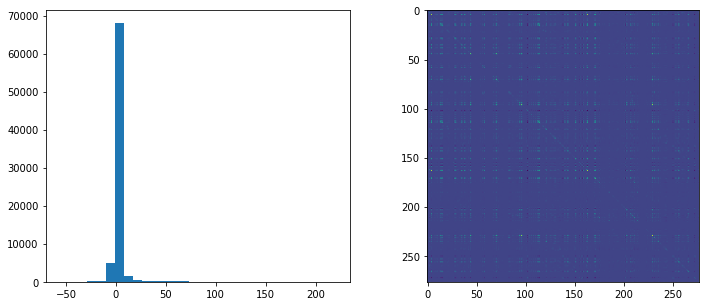

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].hist(cov_mx.flatten(), bins=30)
axes[1].imshow(cov_mx)

In [40]:
np.where(cov_mx.flatten() > 100)[0]

array([ 1112,  1123,  1136,  1143,  1146,  1222,  1259,  1271,  1279,
        4159,  4170,  4269,  4318,  7760,  7784,  7919,  7927,  9699,
        9858, 10530, 10564, 10689, 12232, 12258, 12284, 12417, 19434,
       19460, 19486, 19619, 26132, 26134, 26241, 26267, 26636, 26662,
       26686, 26688, 26795, 26821, 31582, 31593, 31692, 31741, 39754,
       39867, 41831, 41978, 41990, 45155, 45166, 45179, 45186, 45189,
       45265, 45302, 45314, 45322, 47371, 47395, 47530, 47538, 56325,
       56327, 56434, 56460, 63477, 63503, 63527, 63529, 63636, 63662,
       71055, 71168])

In [50]:
falsh = []
for i in range(len(cov_mx)):
    for j in range(len(cov_mx)):
        if j == i:
            continue
        if cov_mx[i][j] > 20:
            falsh.append([i, j])
print(len(falsh))

1344


In [52]:
for pair in falsh[:100]:
    print(unit_names[pair[0]], unit_names[pair[1]])
    break

1-0 1-119


In [48]:
unit_names.index('1-392'), unit_names.index('3-35')

(27, 155)

In [49]:
cov_mx[27, 155]

27.318365491998897